# 2.	Write a python program to fit a second degree parabola of the form $y=a+bx+cx^{2}$ and draw the scatter plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def myMean(data):
    mean = 0
    for i in np.nditer(data):
        mean += i
    mean /= len(data)
    return mean

In [3]:
def det(mat):
    v1 = mat[0,0] * ((mat[1,1] * mat[2,2]) - (mat[1,2] * mat[2,1]))
    v2 = -mat[0,1] * ((mat[1,0] * mat[2,2]) - (mat[1,2] * mat[2,0]))
    v3 = mat[0,2] * ((mat[1,0] * mat[2,1]) - (mat[1,1] * mat[2,0]))
    return v1+v2+v3

Enter x values: 0 1 2 3 4
Enter y values: 1 1.8 1.3 2.5 6.3
The calculated parabola y=1.42+-1.07x+0.55x^2 is the best fit to the given data


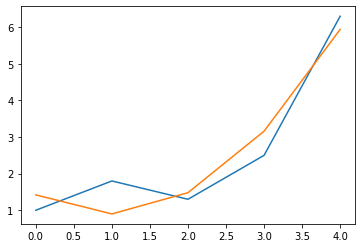

In [4]:
x = np.array([float(i) for i in input("Enter x values: ").split()])
y = np.array([float(i) for i in input("Enter y values: ").split()])
x2, x3, x4, xy, x2y = x**2, x**3, x**4, x*y, (x**2)*y
ybar = myMean(y)

mat = np.array([[len(x), sum(x), sum(x2)], [sum(x), sum(x2), sum(x3)], [sum(x2), sum(x3), sum(x4)]])
v = np.array([[sum(y)], [sum(xy)], [sum(x2y)]])

d = det(mat)
mat1 = np.hstack((v,mat[:,[1,2]]))
d1 = det(mat1)
mat2 = np.hstack((mat[:,[0]],v,mat[:,[2]]))
d2 = det(mat2)

mat3 = np.hstack((mat[:,[0,1]],v))
d3 = det(mat3)

a, b, c = d1/d, d2/d, d3/d
ycal = a+b*x+c*(x**2)

sse = sum((y-ycal)**2)
ssr = sum((ycal-ybar)**2)
sst = ssr + sse

r2 = ssr/sst

plt.plot(x, y)
plt.plot(x, ycal)

if r2>0.9:
    print(f'The calculated parabola y={round(a,4)}+{round(b,4)}x+{round(c,4)}x^2 is the best fit to the given data')
else:
    print(f'The calculated parabola y={round(a,4)}+{round(b,4)}x+{round(c,4)}x^2 is the not best fit to the given data')